In [1]:
import numpy as np
import pandas as pd
import xarray as xr

from pathlib import Path

import altair as alt
from altair.expr import datum

In [2]:
%load_ext watermark

In [3]:
%watermark --iversions

numpy     1.16.3
altair    3.0.1
pandas    0.24.2
xarray    0.12.0



In [4]:
from utils.load import load_sensitivity_data
from utils.calculate_metrics import (process_data, relative_errors, summary_errors)

## Set paths 

In [5]:
((zwf_df, pgi_df, eno_df), debug_info) = load_sensitivity_data()

In [6]:
zwf_df.head()

,flux,ID,BiGG_ID,author,sample_id,normalized_flux
0,-0.020954,ACALD,ACALD,Khodayari,dzwf,-0.472740
1,-0.004096,ACALDtpp_ex,composed of ACALDtex and ACALDtpp,Khodayari,dzwf,-0.092400
2,-0.009307,ACKr,ACKr,Khodayari,dzwf,-0.209985
3,4.326233,ACONTa,ACONTa,Khodayari,dzwf,97.604637
4,4.441212,ACONTb,ACONTb,Khodayari,dzwf,100.198682


In [7]:
xdf_zwf = process_data(zwf_df, author="Nicolas")
xdf_pgi = process_data(pgi_df, author="Usui")
xdf_eno = process_data(eno_df, author="Usui")

In [8]:
xdf_pgi.BiGG_ID

<xarray.DataArray 'BiGG_ID' (BiGG_ID: 29)>
array(['ACKr', 'AKGDH', 'CS', 'EDA', 'EDD', 'ENO', 'FBA', 'FUM', 'G6PDH2r',
       'GAPD', 'GLCptspp', 'GND', 'ICDHyr', 'ICL', 'PDH', 'PFK', 'PGI', 'PGK',
       'PGM', 'PPC', 'PPCK', 'PTAr', 'PYK', 'RPE', 'RPI', 'SUCDi', 'TALA',
       'TKT1', 'TPI'], dtype=object)
Coordinates:
  * BiGG_ID  (BiGG_ID) object 'ACKr' 'AKGDH' 'CS' 'EDA' ... 'TALA' 'TKT1' 'TPI'

In [9]:
xdf_zwf.BiGG_ID

<xarray.DataArray 'BiGG_ID' (BiGG_ID: 18)>
array(['CS', 'EDD', 'ENO', 'FUM', 'G6PDH2r', 'GLCptspp', 'GND', 'ICDHyr',
       'MDH', 'PDH', 'PFK', 'PGI', 'PGK', 'PPC', 'PTAr', 'PYK', 'TALA', 'TKT1'],
      dtype=object)
Coordinates:
  * BiGG_ID  (BiGG_ID) object 'CS' 'EDD' 'ENO' 'FUM' ... 'PYK' 'TALA' 'TKT1'

# 2. Calculate error metrics

In [10]:
x_rel_error_zwf = relative_errors(xdf_zwf, author="Nicolas")
x_rel_error_pgi = relative_errors(xdf_pgi, author="Usui")
x_rel_error_eno = relative_errors(xdf_eno, author="Usui")

In [11]:
x_norm_error_zwf = summary_errors(xdf_zwf, author="Nicolas")
x_norm_error_pgi = summary_errors(xdf_pgi, author="Usui")
x_norm_error_eno = summary_errors(xdf_eno, author="Usui")

In [12]:
summary_errors = xr.concat([x_norm_error_zwf, x_norm_error_pgi, x_norm_error_eno], dim = "sample_id")

# 4. Visualize

### Summary normalized error for the models

In [13]:
from utils.vis import heatmap, summary_chart, jitter_summary_chart

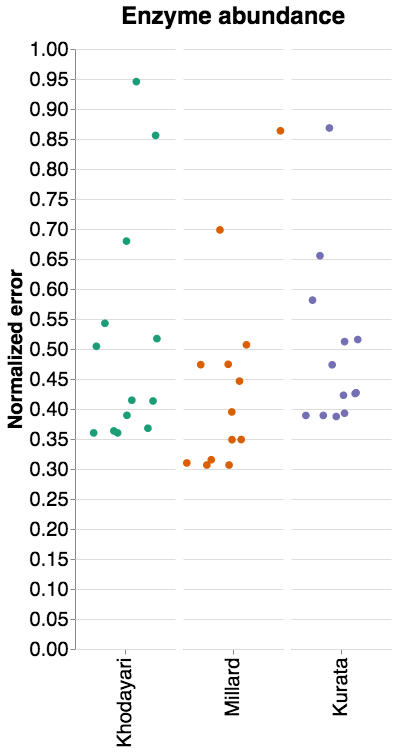

In [14]:
jitter_summary_chart(norm_error=summary_errors,
                     author=["Nicolas","Usui"],
                     title="Enzyme abundance",
                     sort_list=["Khodayari", "Millard", "Kurata"],
                     opacity = False,
              color_scheme = "dark2")

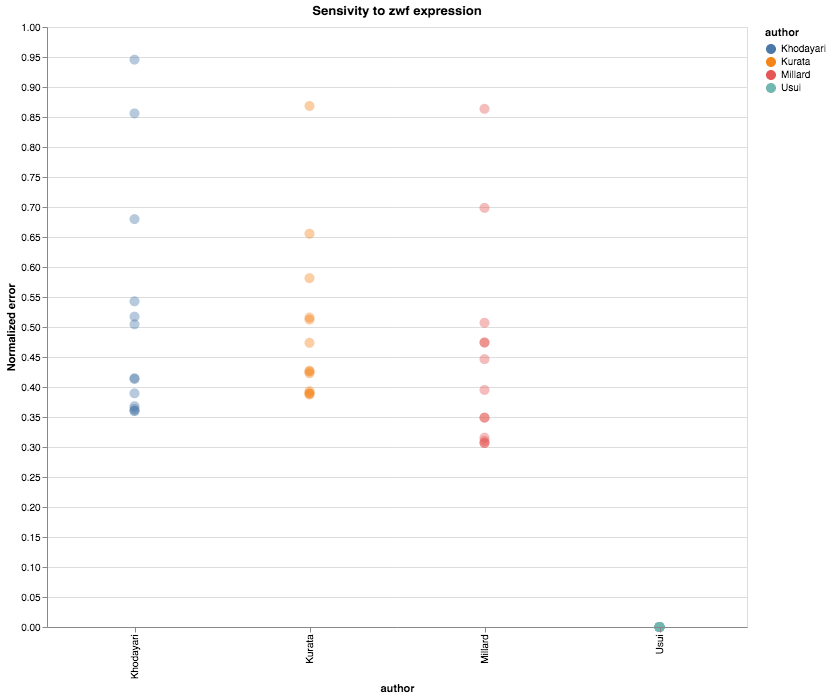

In [17]:
summary_chart(norm_error=summary_errors,
              author="Nicolas",
              title="Sensivity to zwf expression",
              sort_list=["Khodayari", "Kurata", "Millard"])

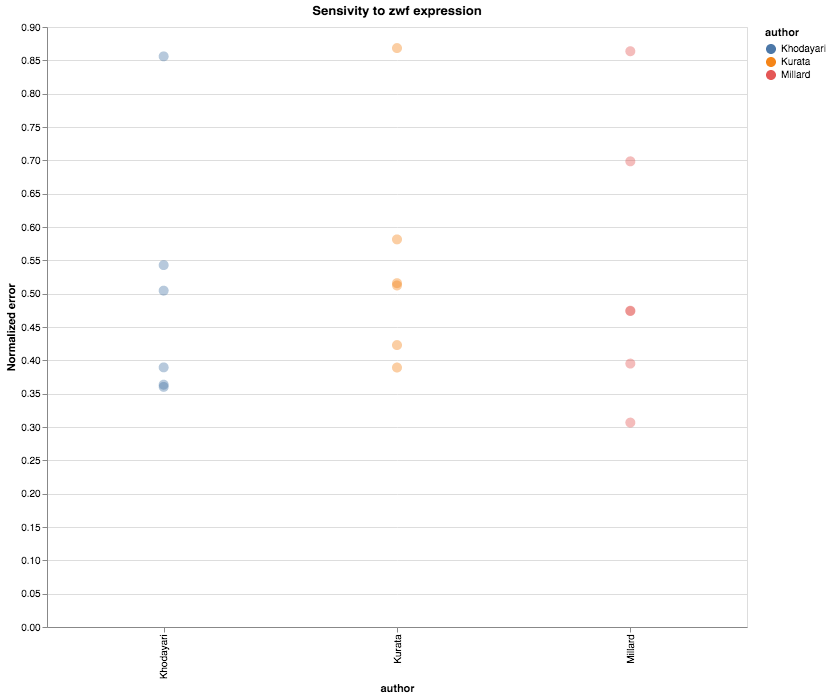

In [22]:
summary_chart(norm_error=x_norm_error_pgi,
              author="Usui",
              title="Sensivity to zwf expression",
              sort_list=["Khodayari", "Kurata", "Millard"])

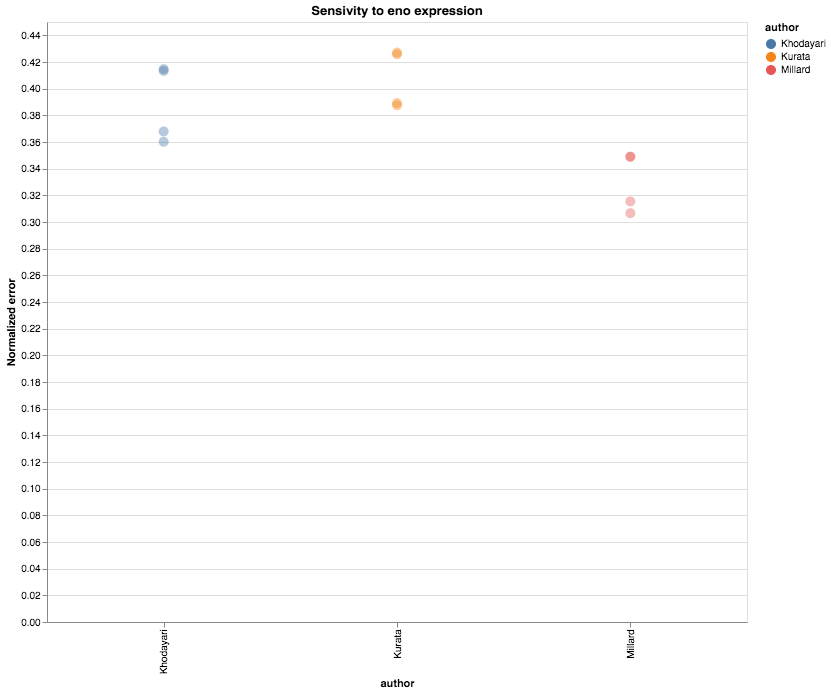

In [15]:
summary_chart(norm_error=x_norm_error_eno,
              author="Usui",
              title="Sensivity to eno expression",
              sort_list=["Khodayari", "Kurata", "Millard"])

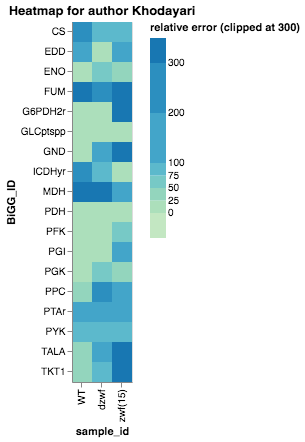

In [16]:
heatmap(xdf=x_rel_error_zwf, author="Khodayari")

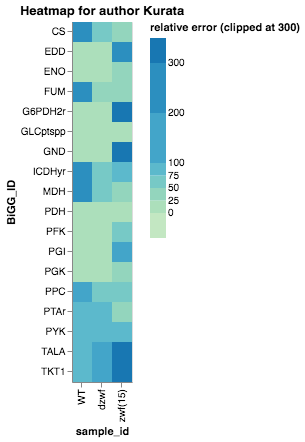

In [17]:
heatmap(xdf=x_rel_error_zwf, author="Kurata")

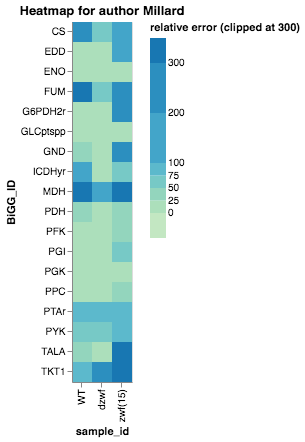

In [18]:
heatmap(xdf=x_rel_error_zwf, author="Millard")

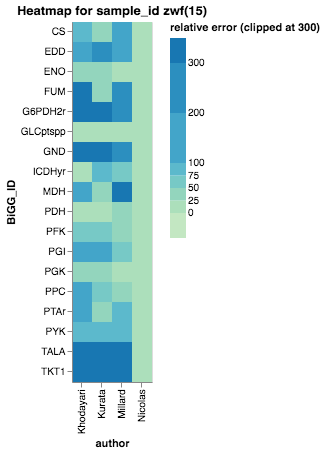

In [23]:
heatmap(xdf=x_rel_error_zwf, sample_id = "zwf(15)")

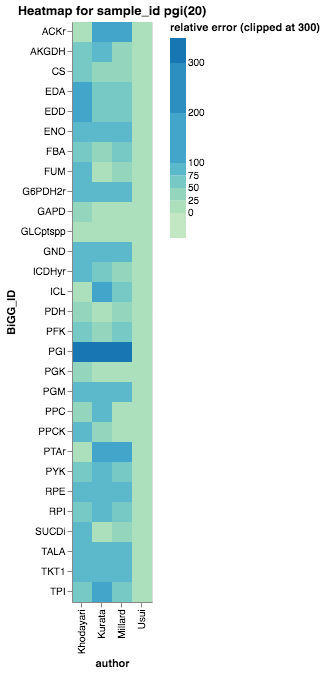

In [20]:
heatmap(xdf=x_rel_error_pgi, sample_id = "pgi(20)")

# Export the data

In [33]:
sensitivity_data = pd.concat([selected_data_zwf, selected_data_pgi, selected_data_eno], sort=False)

In [37]:
data_path = Path('../data')
path = data_path / "Processed"
path.mkdir(parents=True, exist_ok=True)
sensitivity_data.to_csv(path / "sensitivity.csv")